In [58]:
import pandas as pd

df = pd.read_csv("/Users/pablo/Downloads/2008.csv")
df = df[df["Dest"] == 'JFK']
df["Date"] = pd.to_datetime(df.Year*100000000+df.Month*1000000+df.DayofMonth*10000+df.CRSArrTime, format='%Y%m%d%H%M')
#df["Date"] = pd.to_datetime("{y}{m:02d}{d:02d}".format(y=df.Year, m=df.Month, d=df.DayofMonth), format='%Y%m%d')
drop_list = ["FlightNum", "DepTime", "ArrTime", "UniqueCarrier", "FlightNum", "Cancelled", 
             "CancellationCode", "Diverted", "TailNum", "ActualElapsedTime", "AirTime", 
             "TaxiIn", "TaxiOut", "CRSDepTime", "DepDelay", "CarrierDelay", "WeatherDelay", 
             "NASDelay", "SecurityDelay", "LateAircraftDelay", "CRSElapsedTime",
             "Year", "Month", "DayofMonth", "CRSArrTime"]

df.drop(drop_list, axis=1, inplace=True)

df.dropna(axis=0, inplace=True)
df['ctime'] = df['Date'].map(lambda x: (x.hour / 24.0) * 360)
df['cwday'] = df['DayOfWeek'].map(lambda x: int(x / 7.0 * 360)%360)
df['cdate'] = df['Date'].map(lambda x: (x.timetuple().tm_yday / 365.0)*360.0)
df['cdate'] = df['cdate'].map(lambda x: int(10 * round(float(x)/10)))
df.drop(["DayOfWeek", "Origin", "Dest", "Date"], axis=1, inplace=True)
df = df[df["ArrDelay"] > 0]

In [59]:
df.to_csv("/Users/pablo/github/circular_tree/datasets/delays_hope.csv", index=False)

df.head()

,ArrDelay,Distance,ctime,cwday,cdate
129224,17,541,165,102,0
129920,37,541,165,154,0
129921,55,541,225,154,0
129922,22,541,330,154,0
130667,17,541,165,205,0


[   0.   45.   90. ...,  225.  270.  315.]
[0 0 0 ..., 0 0 0]
   0    1  2         3
0  0    0  0  4.800000
1  0   45  0  4.565662
2  0   90  0  3.999907
3  0  135  0  3.434106
4  0  180  0  3.199630


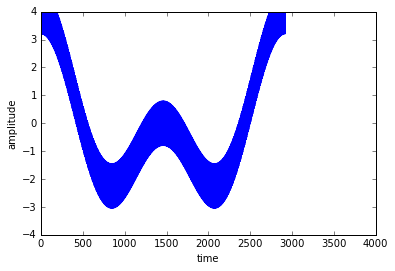

In [147]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def get_wave(f, A, points):
    t = np.arange(0, points, 1)
    x = t * f
    phi = np.pi/2
    y = A * np.sin(2 * np.pi * x/points + phi)
    
    return y

index = pd.date_range('2015-01-01 00:00:00', '2016-01-01 00:00:00', freq='3h')[:-1]
ctime = index.map(lambda x: (x.hour / 24.0) * 360)

print ctime

cdate = index.map(lambda x: (x.timetuple().tm_yday / 365.0)*360.0) 
cdate = (10 * np.round(cdate/10)).astype(np.int) % 360

cwind = index.map(lambda x: (x.timetuple().tm_yday / 365.0)*360.0) 
cwind = 2*((10 * np.round(cdate/10)).astype(np.int)) % 360

print cdate

points = 365 * 8
A = 1
f = 1

t = get_wave(1, 2, ctime.shape[0]) + get_wave(2, 2, ctime.shape[0]) + get_wave(365, .8, ctime.shape[0])

stack = np.concatenate([cdate[...,np.newaxis], ctime[...,np.newaxis], 
                        cwind[...,np.newaxis], t[...,np.newaxis]], axis=1)

df = pd.DataFrame(stack)
df.to_csv("/Users/pablo/github/circular_tree/datasets/false_hope.csv", 
          header=['cdate', 'ctime', 'cwind', 't'], index=False)

print df.head()
plt.plot(np.arange(0, points, 1), t)
plt.axis([0, 4000, -4, 4])
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()